# Deep Learning Model with Text Classification in multiple tagging

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Preprocessing

In [2]:
#reading datasets
data = pd.read_excel('test_assignment.xlsx') 

In [3]:
#Analysing Datsets
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6921 entries, 0 to 6920
Data columns (total 2 columns):
String    6921 non-null object
Tag       6731 non-null float64
dtypes: float64(1), object(1)
memory usage: 108.2+ KB


In [4]:
#Checking dataset
data.head() 

,String,Tag
0,"3GPP Technical Specification Group, ""Spatial c...",1.0
1,"3GPP Technical Specification Group, ""Spatial c...",1.0
2,"3GPP Technical Specification Group, ""Spatial c...",1.0
3,"3GPP Technical Specification Group, ""Spatial c...",1.0
4,"3GPP TR 25.876 V7.0.0 (2007-03), Technical Rep...",2.0


In [5]:
data.shape

(6921, 2)

In [6]:
data.String.nunique()

6920

In [7]:
data.Tag.nunique()

1080

In [8]:
data.isnull().sum()

String      0
Tag       190
dtype: int64

## Feature Engineering

In [9]:
#Removing null values rows from datasets
data_filter = data.dropna(axis=0) 

In [10]:
data_filter.shape

(6731, 2)

In [11]:
data_filter.nunique()

String    6730
Tag       1080
dtype: int64

In [12]:
duplicated = data_filter[data_filter.duplicated()]

In [13]:
#Checking duplicate rows in datasets
duplicated 

,String,Tag


In [14]:
#Checking duplicate string in datasets
duplicated_string = data_filter[data_filter.String.duplicated()] 

In [15]:
duplicated_string

,String,Tag
1623,Final Office Action from U.S. Patent Applicati...,302.0


In [16]:
#Dropping duplicate string from datasets
data_filter.drop_duplicates(subset ="String", inplace=True)

C:\Users\Abhishek Tyagi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
data_filter.shape

(6730, 2)

In [18]:
data_filter.head()

,String,Tag
0,"3GPP Technical Specification Group, ""Spatial c...",1.0
1,"3GPP Technical Specification Group, ""Spatial c...",1.0
2,"3GPP Technical Specification Group, ""Spatial c...",1.0
3,"3GPP Technical Specification Group, ""Spatial c...",1.0
4,"3GPP TR 25.876 V7.0.0 (2007-03), Technical Rep...",2.0


In [19]:
data_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6730 entries, 0 to 6920
Data columns (total 2 columns):
String    6730 non-null object
Tag       6730 non-null float64
dtypes: float64(1), object(1)
memory usage: 157.7+ KB


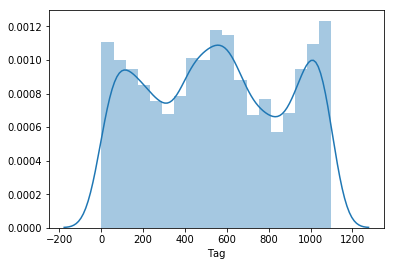

In [20]:
sns.distplot(data_filter.Tag)

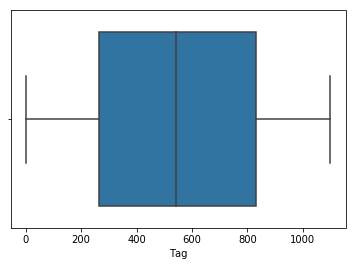

In [21]:
sns.boxplot(data_filter.Tag)

In [22]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Abhishek
[nltk_data]     Tyagi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus = []

In [24]:
messages = []
for i in data_filter['String']:
    messages.append(i)

In [25]:
for j in range(0, len(data_filter)):
    review = re.sub('[^a-zA-Z]', '', messages[j])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ''.join(review)
    corpus.append(review)

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
x = cv.fit_transform(corpus).toarray()

In [72]:
x.reshape(-1,1)

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]])

In [73]:
x.shape

(6730, 3238)

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
sc = MinMaxScaler(feature_range = (0, 1))
y = data_filter[['Tag']].values
y_sc = sc.fit_transform(y)

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_sc, test_size=0.2, random_state=42)

In [66]:
import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam

In [67]:
model = Sequential([Dense(32, input_dim=1, activation='relu'),Dense(16, activation='relu'), Dense(1, activation='sigmoid')])

In [68]:
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [69]:
model.fit(x_train,y_train, batch_size=10, epochs=10)

Epoch 1/10
5384/5384 [==============================] - 4s 685us/step - loss: 0.6931 - accuracy: 0.0015
Epoch 2/10
5384/5384 [==============================] - 1s 167us/step - loss: 0.6931 - accuracy: 0.0017
Epoch 3/10
5384/5384 [==============================] - 1s 164us/step - loss: 0.6930 - accuracy: 0.0011
Epoch 4/10
5384/5384 [==============================] - 1s 167us/step - loss: 0.6930 - accuracy: 9.2868e-04
Epoch 5/10
5384/5384 [==============================] - 1s 167us/step - loss: 0.6930 - accuracy: 0.0015
Epoch 6/10
5384/5384 [==============================] - 1s 167us/step - loss: 0.6930 - accuracy: 0.0011TA: 0s - loss:
Epoch 7/10
5384/5384 [==============================] - 1s 169us/step - loss: 0.6930 - accuracy: 9.2868e-04
Epoch 8/10
5384/5384 [==============================] - 1s 174us/step - loss: 0.6930 - accuracy: 9.2868e-04
Epoch 9/10
5384/5384 [==============================] - 1s 171us/step - loss: 0.6930 - accuracy: 0.0011
Epoch 10/10
5384/5384 [===============